# SNP and Indel Post analysis using Gemini
## Loss of function analysis


We identify 1669 variants with an allele frequency of >1% that cause a loss of function (according to gemini/+?).
The affected genes are 


Preprocessing:

`gemini query --header -q "select * from variants where is_lof = 1 and aaf >= 0.01" 153_gemini_pass_normalized.db > /tmp/lof.tsv`

In [6]:
!conda install -y matplotlib

Solving environment: done

## Package Plan ##

  environment location: /Users/ahenschel/Applications/miniconda3/envs/bokeh

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.2.0           |   py38ha0d09dd_0          56 KB  conda-forge
    matplotlib-3.2.1           |                0           6 KB  conda-forge
    matplotlib-base-3.2.1      |   py38h1300a51_0         7.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.1 MB

The following NEW packages will be INSTALLED:

  cycler             conda-forge/noarch::cycler-0.10.0-py_2
  kiwisolver         conda-forge/osx-64::kiwisolver-1.2.0-py38ha0d09dd_0
  matplotlib         conda-forge/osx-64::matplotlib-3.2.1-0
  matplotlib-base    conda-forge/osx-64::matplotlib-base-3.2.1-py38h1300a51_0



ki

In [7]:
import pandas as pd
from IPython.display import display
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

import numpy as np

In [8]:
df = pd.read_csv('lof.tsv.gz', sep='\t')
pd.options.display.max_columns = None ## show all columns
# To filter out those that are very common (many have Gnomad AF>90%), we restrict the search to 
#df[(df.gnomad_popmax_AF<.05) & (df.gnomad_popmax_AF>0)].sort_values(by='aaf')
df[(df.gnomad_popmax_AF<.05)].sort_values(by='aaf', ascending=False)


,chrom,start,end,vcf_id,variant_id,anno_id,ref,alt,qual,filter,type,sub_type,call_rate,max_aaf_all,in_dbsnp,rs_ids,sv_cipos_start_left,sv_cipos_end_left,sv_cipos_start_right,sv_cipos_end_right,sv_length,sv_is_precise,sv_tool,sv_evidence_type,sv_event_id,sv_mate_id,sv_strand,in_omim,clinvar_sig,clinvar_disease_name,clinvar_origin,clinvar_dsdb,clinvar_dsdbid,clinvar_gene_phenotype,geno2mp_hpo_ct,pfam_domain,cyto_band,rmsk,in_cpg_island,in_segdup,is_conserved,gerp_bp_score,gerp_element_pval,num_hom_ref,num_het,num_hom_alt,num_unknown,aaf,hwe,inbreeding_coeff,pi,recomb_rate,gene,transcript,is_exonic,is_coding,is_splicing,is_lof,exon,codon_change,aa_change,aa_length,biotype,impact,impact_so,impact_severity,polyphen_pred,polyphen_score,sift_pred,sift_score,anc_allele,rms_bq,cigar,depth,strand_bias,rms_map_qual,in_hom_run,num_mapq_zero,num_alleles,num_reads_w_dels,haplotype_score,qual_depth,allele_count,allele_bal,in_hm2,in_hm3,is_somatic,somatic_score,in_esp,aaf_esp_ea,aaf_esp_aa,aaf_esp_all,exome_chip,in_1kg,aaf_1kg_amr,aaf_1kg_eas,aaf_1kg_sas,aaf_1kg_afr,aaf_1kg_eur,aaf_1kg_all,grc,gms_illumina,gms_solid,gms_iontorrent,in_cse,encode_tfbs,encode_dnaseI_cell_count,encode_dnaseI_cell_list,encode_consensus_gm12878,encode_consensus_h1hesc,encode_consensus_helas3,encode_consensus_hepg2,encode_consensus_huvec,encode_consensus_k562,vista_enhancers,cosmic_ids,info,cadd_raw,cadd_scaled,fitcons,in_exac,aaf_exac_all,aaf_adj_exac_all,aaf_adj_exac_afr,aaf_adj_exac_amr,aaf_adj_exac_eas,aaf_adj_exac_fin,aaf_adj_exac_nfe,aaf_adj_exac_oth,aaf_adj_exac_sas,exac_num_het,exac_num_hom_alt,exac_num_chroms,aaf_gnomad_all,aaf_gnomad_afr,aaf_gnomad_amr,aaf_gnomad_asj,aaf_gnomad_eas,aaf_gnomad_fin,aaf_gnomad_nfe,aaf_gnomad_oth,aaf_gnomad_sas,aaf_gnomad_non_neuro,aaf_gnomad_controls,aaf_gnomad_non_cancer,gnomad_popmax_AF,gnomad_num_het,gnomad_num_hom_alt,gnomad_num_chroms
253,chr3,14444284,14444286,rs397988770;rs66774122,4232346,1,GC,G,190627.000000,None,indel,del,0.784314,1.000000,1,"rs66774122,rs397988770",None,None,None,None,None,1,None,None,None,None,None,0,None,None,None,None,None,None,-1,None,chr3p25.1,None,1,0,0,None,None,0,0,120,33,1.00,1.000000,None,0.000000,0.948966,SLC6A6,NM_001134367.3,1,1,0,1,5,cag/,Q64,None,protein_coding,frameshift_variant,frameshift_variant,HIGH,None,None,None,None,None,None,None,4144,None,59.980000,None,None,240,None,None,29.750000,240,None,None,None,None,None,0,-1.0,-1.0,-1.0,0,1,1.0000,1.0,1.000,1.0000,1.0,1.000000,None,None,None,None,0,"Pol2_21,TAF1_4,HA-E2F1_2",None,None,TSS,TSS,TSS,TSS,TSS,TSS,None,None,None,None,None,None,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,-1
254,chr3,14444307,14444309,rs68047955,4232347,1,CT,C,187026.000000,None,indel,del,0.784314,1.000000,1,rs68047955,None,None,None,None,None,1,None,None,None,None,None,0,None,None,None,None,None,None,-1,None,chr3p25.1,None,1,0,0,None,None,0,0,120,33,1.00,1.000000,None,0.000000,0.948966,SLC6A6,NM_001134367.3,0,0,1,1,5,NaN,NaN,None,protein_coding,splice_acceptor_variant,splice_acceptor_variant,HIGH,None,None,None,None,None,None,None,4120,None,59.970001,None,None,240,None,None,32.150002,240,None,None,None,None,None,0,-1.0,-1.0,-1.0,0,1,1.0000,1.0,1.000,1.0000,1.0,1.000000,None,None,None,None,0,"Pol2_21,TAF1_4,HA-E2F1_2",None,None,TSS,TSS,TSS,TSS,TSS,TSS,None,None,None,None,None,None,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,-1
310,chr3,133969486,133969487,rs587744425,5273619,1,G,GC,134311.000000,None,indel,ins,0.784314,1.000000,1,rs587744425,None,None,None,None,None,1,None,None,None,None,None,0,None,None,None,None,None,None,35,None,chr3q22.2,Simple_repeat_Simple_repeat_(CCG)n,1,0,0,None,Non

In [9]:
Counter(df.type)

Counter({'indel': 1033, 'snp': 625, 'unknown': 11})

In [10]:
df[df['in_dbsnp']==0].sort_values(by='aaf')

,chrom,start,end,vcf_id,variant_id,anno_id,ref,alt,qual,filter,type,sub_type,call_rate,max_aaf_all,in_dbsnp,rs_ids,sv_cipos_start_left,sv_cipos_end_left,sv_cipos_start_right,sv_cipos_end_right,sv_length,sv_is_precise,sv_tool,sv_evidence_type,sv_event_id,sv_mate_id,sv_strand,in_omim,clinvar_sig,clinvar_disease_name,clinvar_origin,clinvar_dsdb,clinvar_dsdbid,clinvar_gene_phenotype,geno2mp_hpo_ct,pfam_domain,cyto_band,rmsk,in_cpg_island,in_segdup,is_conserved,gerp_bp_score,gerp_element_pval,num_hom_ref,num_het,num_hom_alt,num_unknown,aaf,hwe,inbreeding_coeff,pi,recomb_rate,gene,transcript,is_exonic,is_coding,is_splicing,is_lof,exon,codon_change,aa_change,aa_length,biotype,impact,impact_so,impact_severity,polyphen_pred,polyphen_score,sift_pred,sift_score,anc_allele,rms_bq,cigar,depth,strand_bias,rms_map_qual,in_hom_run,num_mapq_zero,num_alleles,num_reads_w_dels,haplotype_score,qual_depth,allele_count,allele_bal,in_hm2,in_hm3,is_somatic,somatic_score,in_esp,aaf_esp_ea,aaf_esp_aa,aaf_esp_all,exome_chip,in_1kg,aaf_1kg_amr,aaf_1kg_eas,aaf_1kg_sas,aaf_1kg_afr,aaf_1kg_eur,aaf_1kg_all,grc,gms_illumina,gms_solid,gms_iontorrent,in_cse,encode_tfbs,encode_dnaseI_cell_count,encode_dnaseI_cell_list,encode_consensus_gm12878,encode_consensus_h1hesc,encode_consensus_helas3,encode_consensus_hepg2,encode_consensus_huvec,encode_consensus_k562,vista_enhancers,cosmic_ids,info,cadd_raw,cadd_scaled,fitcons,in_exac,aaf_exac_all,aaf_adj_exac_all,aaf_adj_exac_afr,aaf_adj_exac_amr,aaf_adj_exac_eas,aaf_adj_exac_fin,aaf_adj_exac_nfe,aaf_adj_exac_oth,aaf_adj_exac_sas,exac_num_het,exac_num_hom_alt,exac_num_chroms,aaf_gnomad_all,aaf_gnomad_afr,aaf_gnomad_amr,aaf_gnomad_asj,aaf_gnomad_eas,aaf_gnomad_fin,aaf_gnomad_nfe,aaf_gnomad_oth,aaf_gnomad_sas,aaf_gnomad_non_neuro,aaf_gnomad_controls,aaf_gnomad_non_cancer,gnomad_popmax_AF,gnomad_num_het,gnomad_num_hom_alt,gnomad_num_chroms
344,chr4,3076652,3076660,rs1491545415;rs746481543;rs754481229;402953,5893492,1,AGCAGCAG,*,8867.429688,None,indel,del,0.980392,-1.000000,0,None,None,None,None,None,None,1,None,None,None,None,None,0,None,None,None,None,None,huntington's_chorea|inborn_genetic_diseases|lo...,-1,None,chr4p16.3,Simple_repeat_Simple_repeat_(CAG)n;trf;trf;Sim...,0,0,0,None,1.10934e-48,147,3,0,3,0.010000,0.901544,-0.010101010101,0.019866,0.238862,HTT,NM_002111.8,1,1,0,1,1,cag/,Q34,None,protein_coding,frameshift_variant,frameshift_variant,HIGH,None,None,None,None,None,None,None,4555,None,54.230000,None,None,306,None,None,15.24,3,None,None,None,None,None,0,-1.0,-1.0,-1.0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,None,None,None,None,0,None,3,E_myoblast;Phte;hTH1,TSS,TSS,unknown,unknown,TSS,TSS,None,None,None,None,None,None,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,-1
1262,chr17,7751021,7751024,rs758821377,21721455,1,CTG,C,13950.200195,None,indel,del,0.980392,0.000038,0,None,None,None,None,None,None,1,None,None,None,None,None,0,None,None,None,None,None,inborn_genetic_diseases|oromandibular-limb_hyp...,-1,None,chr17p13.1,Low_complexity_Low_complexity_C-rich,0,0,1,None,0.0,147,3,0,3,0.010000,0.901544,-0.010101010101,0.019866,0.074644,KDM6B,NM_001080424.1,1,1,0,1,11,tgt/,C473,None,protein_coding,frameshift_variant,frameshift_variant,HIGH,None,None,None,None,None,None,None,2469,None,60.669998,None,None,300,None,None,10.16,3,None,None,None,None,None,0,-1.0,-1.0,-1.0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,None,None,None,None,0,None,None,None,T,R,R,T,T,T,None,None,None,None,None,0.57788,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,0.000021,0.0,0.0,0.0,0.0,0.000069,0.000038,0.0,0.0,0.000025,0.000049,0.000022,0.000038,3,0,139904
167,chr2,20867212,20867215,None,2174990,1,GCC,*,47.520000,None,indel,del,0.980392,-1.000000,0,None,None,None,None,None,None,1,None,None,None,None,None,0,None,None,None,None,None,None,-1,None,chr2p24.1,Low_complexity_Low_complexity_GC_rich,1,0,0,None,4.73968e-52,147,3,0,3,0.010000,0.901544

### LoF variants common in the UAE and rare world wide 
we determine which Loss of Function variants exceed 5% allele frequency in the local population but are below 1% world wide, according to GnomAD allele frequencies. We identify 15 UAE specific variants that cause a lo


In [11]:
relcols = "chrom,start,end,vcf_id,ref,alt,clinvar_gene_phenotype,clinvar_sig,aaf,inbreeding_coeff,gene,is_exonic,is_coding,codon_change,rmsk,impact,impact_severity".split(',')
gnomadAFs = "aaf_gnomad_all	aaf_gnomad_afr	aaf_gnomad_amr	aaf_gnomad_asj	aaf_gnomad_eas	aaf_gnomad_fin	aaf_gnomad_nfe	aaf_gnomad_oth	aaf_gnomad_sas	aaf_gnomad_non_neuro	aaf_gnomad_controls	aaf_gnomad_non_cancer	gnomad_popmax_AF".split()
df0 = df[(df.aaf>.05) & (df.gnomad_popmax_AF<.01) & (df.gnomad_popmax_AF>=0)].sort_values(by='aaf')
df0[relcols+gnomadAFs]

,chrom,start,end,vcf_id,ref,alt,clinvar_gene_phenotype,clinvar_sig,aaf,inbreeding_coeff,gene,is_exonic,is_coding,codon_change,rmsk,impact,impact_severity,aaf_gnomad_all,aaf_gnomad_afr,aaf_gnomad_amr,aaf_gnomad_asj,aaf_gnomad_eas,aaf_gnomad_fin,aaf_gnomad_nfe,aaf_gnomad_oth,aaf_gnomad_sas,aaf_gnomad_non_neuro,aaf_gnomad_controls,aaf_gnomad_non_cancer,gnomad_popmax_AF
807,chr11,1018087,1018089,rs368342230,TG,T,malignant_tumor_of_prostate,None,0.052288,-0.0551724137931,MUC6,1,1,cca/,trf;trf;trf,frameshift_variant,HIGH,0.000004,0.000000,0.000030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000009,0.000004,0.000030
221,chr2,206641238,206641243,rs527478913,TCGCA,T,hirschsprung_disease_1|inborn_genetic_diseases,None,0.055556,-0.0588235294118,NRP2,1,1,tcgcac/,None,frameshift_variant,HIGH,0.003908,0.002605,0.001201,0.006143,0.000000,0.002246,0.006161,0.005222,0.001685,0.003803,0.003275,0.003716,0.006161
222,chr2,206641244,206641245,rs200483574;218758,T,TA,hirschsprung_disease_1|inborn_genetic_diseases,benign,0.055556,-0.0588235294118,NRP2,1,1,tgc/tAgc,None,frameshift_variant,HIGH,0.005375,0.004009,0.001907,0.007816,0.000055,0.002817,0.008462,0.006606,0.002247,0.005226,0.004773,0.005110,0.008462
16,chr1,16262474,16262477,rs765451626,CTG,C,ductal_breast_carcinoma,None,0.055921,-0.0592334494774,SPEN,1,1,cctgcc/,Low_complexity_Low_complexity_C-rich;trf,frameshift_variant,HIGH,0.003340,0.002958,0.000976,0.001470,0.001081,0.007756,0.004655,0.001010,0.001456,0.001977,0.002649,0.003190,0.004655
809,chr11,1018092,1018093,rs376177791,G,GT,malignant_tumor_of_prostate,None,0.058824,-0.0625,MUC6,1,1,cca/ccaA,trf;trf;trf,frameshift_variant,HIGH,0.000006,0.000000,0.000055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.000006,0.000055
851,chr11,8414088,8414089,rs200962114,C,CA,pancreatic_neoplasms,None,0.062092,-0.0662020905923,STK33,1,1,tcc/tccT,None,frameshift_variant,HIGH,0.003659,0.000741,0.002268,0.017831,0.000000,0.000557,0.003970,0.006891,0.004974,0.003818,0.003557,0.003704,0.004974
852,chr11,8414089,8414090,rs201927394,G,GAACCA,pancreatic_neoplasms,None,0.062092,-0.0662020905923,STK33,1,1,tcc/tcTGGTTc,None,frameshift_variant,HIGH,0.004211,0.000742,0.002839,0.020316,0.000000,0.000743,0.004523,0.007781,0.005743,0.004356,0.004085,0.004277,0.005743
341,chr4,3076649,3076652,rs751281707;402952,AGC,A,huntington's_chorea|inborn_genetic_diseases|lo...,benign,0.068627,0.130827067669,HTT,1,1,cagcag/,Simple_repeat_Simple_repeat_(CAG)n;trf;trf;Sim...,frameshift_variant,HIGH,0.008383,0.003982,0.006472,0.023073,0.000413,0.003855,0.009732,0.010610,0.005794,0.008155,0.006803,0.008391,0.009732
5,chr1,6505835,6505841,rs753994746,CAGCTT,C,"deafness,_autosomal_recessive_36,_with_or_with...",None,0.086093,-0.0942028985507,ESPN,1,1,agcttc/,Low_complexity_Low_complexity_C-rich,frameshift_variant,HIGH,0.002098,0.002320,0.002234,0.001969,0.007081,0.000486,0.002043,0.001376,0.001316,0.002125,0.002027,0.002134,0.007081
339,chr4,2044127,2044128,rs570712;rs764547021,C,CT,None,None,0.100000,-0.111111111111,C4orf48,1,1,ccg/ccTg,Simple_repeat_Simple_repeat_(CTG)n,frameshift_variant,HIGH,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000223,0.000000,0.000000,0.000084,0.000000,0.000073,0.000223


In [12]:
df0.to_csv('lof_commonUAEonly.tsv')

In [13]:
', '. join(Counter(df0.gene).keys())

'MUC6, NRP2, SPEN, STK33, HTT, ESPN, C4orf48, STAG2, ARSD, SLC9B1, ZNF717'

In [14]:
Counter(df0.gene).most_common()

[('MUC6', 2),
 ('NRP2', 2),
 ('STK33', 2),
 ('STAG2', 2),
 ('SPEN', 1),
 ('HTT', 1),
 ('ESPN', 1),
 ('C4orf48', 1),
 ('ARSD', 1),
 ('SLC9B1', 1),
 ('ZNF717', 1)]

In [15]:
sorted([f"AF_{af.split('_')[2].upper()}" for af in gnomadAFs[:-1]])

['AF_AFR',
 'AF_ALL',
 'AF_AMR',
 'AF_ASJ',
 'AF_CONTROLS',
 'AF_EAS',
 'AF_FIN',
 'AF_NFE',
 'AF_NON',
 'AF_NON',
 'AF_OTH',
 'AF_SAS']

In [16]:
Counter(df.gene).most_common()


[('MUC19', 27),
 ('EPPK1', 13),
 ('UBXN11', 12),
 ('SSPO', 11),
 ('TBP', 9),
 ('MUC6', 9),
 ('POLR3C', 8),
 ('SLC6A6', 8),
 ('MUC4', 8),
 ('MYO19', 8),
 ('SYN2', 7),
 ('ZAN', 7),
 ('MUC5AC', 7),
 ('PKD1L2', 7),
 ('ASPN', 6),
 ('ABCA10', 6),
 ('MYO15B', 6),
 ('ANKLE1', 6),
 ('SUPT20HL1', 6),
 ('MAML3', 5),
 ('FAM166B', 5),
 ('ABO', 5),
 ('C11orf40', 5),
 ('DGKH', 5),
 ('LOC283710', 5),
 ('RAI1', 5),
 ('C20orf96', 5),
 ('CDCP2', 4),
 ('RHBG', 4),
 ('GIGYF2', 4),
 ('HTT', 4),
 ('ANKDD1B', 4),
 ('PRIM2', 4),
 ('HDAC9', 4),
 ('ODF1', 4),
 ('PTCHD3', 4),
 ('CCDC7', 4),
 ('CHST15', 4),
 ('DRD4', 4),
 ('B3GNT6', 4),
 ('CELA1', 4),
 ('IRF2BPL', 4),
 ('SERPINA1', 4),
 ('EFCAB13', 4),
 ('CEP89', 4),
 ('DMKN', 4),
 ('STAG2', 4),
 ('AIM1L', 3),
 ('SNX27', 3),
 ('DENND4B', 3),
 ('FMO2', 3),
 ('LAD1', 3),
 ('DNAH14', 3),
 ('PLCL2', 3),
 ('ZNF717', 3),
 ('HSD17B13', 3),
 ('FAM81B', 3),
 ('SRA1', 3),
 ('SRSF3', 3),
 ('EFHC1', 3),
 ('GPRC6A', 3),
 ('OPRM1', 3),
 ('MUC3A', 3),
 ('KRBA1', 3),
 ('VPS13B', 

In [17]:
df1 = df.groupby(['gene']).sum()
df1

,start,end,variant_id,anno_id,qual,call_rate,max_aaf_all,in_dbsnp,sv_is_precise,in_omim,geno2mp_hpo_ct,in_cpg_island,in_segdup,is_conserved,num_hom_ref,num_het,num_hom_alt,num_unknown,aaf,hwe,pi,is_exonic,is_coding,is_splicing,is_lof,exon,depth,rms_map_qual,num_alleles,qual_depth,allele_count,in_esp,aaf_esp_ea,aaf_esp_aa,aaf_esp_all,exome_chip,in_1kg,aaf_1kg_amr,aaf_1kg_eas,aaf_1kg_sas,aaf_1kg_afr,aaf_1kg_eur,aaf_1kg_all,in_cse,in_exac,aaf_exac_all,aaf_adj_exac_all,aaf_adj_exac_afr,aaf_adj_exac_amr,aaf_adj_exac_eas,aaf_adj_exac_fin,aaf_adj_exac_nfe,aaf_adj_exac_oth,aaf_adj_exac_sas,exac_num_het,exac_num_hom_alt,exac_num_chroms,aaf_gnomad_all,aaf_gnomad_afr,aaf_gnomad_amr,aaf_gnomad_asj,aaf_gnomad_eas,aaf_gnomad_fin,aaf_gnomad_nfe,aaf_gnomad_oth,aaf_gnomad_sas,aaf_gnomad_non_neuro,aaf_gnomad_controls,aaf_gnomad_non_cancer,gnomad_popmax_AF,gnomad_num_het,gnomad_num_hom_alt,gnomad_num_chroms
gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A2M,9246175,9246181,17251393,1,24684.699219,0.993464,0.211000,1,1,1,-1,0,0,0,108,39,5,1,0.161184,0.528366,0.271300,0,0,1,1,17,4018,60.000000,304,20.620001,49,1,0.155640,0.175000,0.161752,0,1,0.0965,0.0456,0.1697,0.2110,0.1750,0.146565,0,1,0.140000,0.150681,0.203462,0.075406,0.038257,0.108519,0.165227,0.147619,0.190649,14210,1215,110432,0.137263,0.196503,0.079700,0.183179,0.032167,0.106309,0.156122,0.145234,0.165049,0.138626,0.132793,0.136094,0.196503,26492,2267,226034
A2ML1,9016561,9016564,17249367,1,20069.900391,1.000000,0.068876,1,1,0,116,0,0,1,126,27,0,0,0.088235,0.231295,0.161427,1,1,0,1,29,4971,60.000000,306,18.570000,27,1,0.053019,0.010535,0.039444,0,1,0.0432,0.0020,0.0562,0.0023,0.0447,0.026957,0,1,0.044000,0.044417,0.010202,0.028522,0.000116,0.036287,0.052455,0.061247,0.068876,5059,151,120696,0.043180,0.009365,0.028452,0.063532,0.000167,0.031035,0.052513,0.051274,0.067974,0.043259,0.040874,0.043241,0.067974,10148,306,249188
A3GALT2,33777668,33777673,312090,1,3206.659912,0.993464,0.026835,1,1,0,64,0,0,1,147,5,0,1,0.016447,0.836660,0.032460,1,1,0,1,4,4081,60.000000,304,18.120001,5,1,0.026835,0.006650,0.020215,0,1,0.0173,0.0020,0.0041,0.0000,0.0219,0.007987,0,1,0.015000,0.015337,0.004839,0.007295,0.000117,0.010992,0.022607,0.011710,0.007680,1755,24,117556,0.015068,0.004094,0.008796,0.009002,0.000056,0.010823,0.024450,0.014300,0.007831,0.014923,0.013535,0.014705,0.024450,3603,51,245892
AADACL3,12776217,12776218,123268,1,91317.796875,0.960784,0.916200,1,1,0,-1,0,0,0,8,28,111,6,0.850340,0.002281,0.255392,1,1,0,1,1,3697,59.970001,294,25.730000,250,0,-1.000000,-1.000000,-1.000000,0,1,0.8948,0.7321,0.9162,0.8812,0.8638,0.856430,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,-1
ABCA10,403038306,403038320,133196359,6,177174.430176,5.633987,1.561500,6,6,0,8,0,0,1,762,97,3,56,0.342211,4.552640,0.627315,6,6,0,6,140,29273,359.800003,1834,106.450000,103,5,-0.778975,-0.112541,-0.552019,1,6,0.6225,0.3333,0.1596,1.2662,0.1968,0.558307,0,6,0.303000,0.303432,1.078181,0.539120,0.413717,0.256429,0.158022,0.240171,0.207363,30379,2735,724098,0.305677,1.070623,0.541869,0.204625,0.414999,0.259952,0.154810,0.257377,0.204718,0.320355,0.321151,0.307696,1.346990,65370,5354,1484600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRANB3,135965001,135965002,3130071,1,2276.790039,0.993464,0.106700,1,1,0,-1,0,0,1,143,9,0,1,0.029605,0.706817,0.057647,0,0,1,1,19,3755,60.000000,304,10.350000,9,1,0.000487,0.089381,0.028344,1,1,0.0043,0.0000,0.0000,0.1067,0.0000,0.028754,0,1,0.008310,0.008831,0.090750,0.004694,0.000000,0.000000,0.000818,0.007282,0.000277,903,47,11289

## Clinvar analysis
`gemini query --header -q "select chrom,start,end,vcf_id,ref,alt,clinvar_gene_phenotype,clinvar_sig,aaf,inbreeding_coeff,gene,is_exonic,is_coding,codon_change,rmsk,impact from variants WHERE clinvar_sig IS NOT NULL" 153_gemini_pass_normalized.db | gzip > ~/RefGenome/clinvarSig.tsv.gz`


Possibly try:
`gemini query --header -q "select * from variants WHERE clinvar_sig IS NOT NULL" 153_gemini_pass_normalized.db | gzip > ~/RefGenome/clinvarSig.tsv.gz`
(Checking those variants that are clinvar)

In [18]:
clin = pd.read_csv('clinvarSig.tsv.gz', sep='\t')


In [19]:
Counter(clin.chrom)
#Counter(clin.impact).most_common()


Counter({'chr1': 4128,
         'chr2': 4539,
         'chr3': 2552,
         'chr4': 1880,
         'chr5': 2787,
         'chr6': 2265,
         'chr7': 1929,
         'chr8': 1799,
         'chr9': 2288,
         'chr10': 2014,
         'chr11': 2644,
         'chr12': 2391,
         'chr13': 1251,
         'chr14': 1564,
         'chr15': 1593,
         'chr16': 2443,
         'chr17': 3001,
         'chr18': 987,
         'chr19': 2265,
         'chr20': 1113,
         'chr21': 745,
         'chr22': 1036,
         'chrX': 1131})

In [20]:
Counter(clin.clinvar_gene_phenotype).most_common()

[('None', 2282),
 ('abnormality_of_neuronal_migration|areflexia_of_lower_limbs|arrhythmogenic_right_ventricular_cardiomyopathy|arrhythmogenic_right_ventricular_cardiomyopathy,_type_9|arrhythmogenic_right_ventricular_dysplasia,_familial_1|autosomal_recessive_centronuclear_myopathy|bilateral_talipes_equinovarus|broad-based_gait|cap-congenital_myopathy_with_arthrogryposis_multiplex_congenita_without_heart_involvement|cardiac_arrest|cardiomyopathy|cardiovascular_phenotype|congenital_muscular_dystrophy|decreased_patellar_reflex|delayed_gross_motor_development|diastolic_dysfunction|dilated_cardiomyopathy,_dominant|dilated_cardiomyopathy|dilated_cardiomyopathy_1g|dilated_cardiomyopathy_1s|distal_muscle_weakness|distal_myopathy_markesbery-griggs_type|emg_abnormality|familial_dilated_cardiomyopathy|familial_hypertrophic_cardiomyopathy_1|familial_hypertrophic_cardiomyopathy_9|fatty_replacement_of_skeletal_muscle|gait_disturbance|gowers_sign|heart_murmur|hereditary_myopathy_with_early_respiratory

In [21]:
Counter(clin.clinvar_sig).most_common()

[('benign', 19478),
 ('likely_benign', 11475),
 ('benign/likely_benign', 6654),
 ('uncertain_significance', 6548),
 ('conflicting_interpretations_of_pathogenicity', 2692),
 ('not_provided', 556),
 ('pathogenic', 184),
 ('other', 175),
 ('drug_response', 139),
 ('risk_factor', 121),
 ('association', 96),
 ('likely_pathogenic', 66),
 ('conflicting_interpretations_of_pathogenicity,_risk_factor', 17),
 ('pathogenic/likely_pathogenic', 15),
 ('benign/likely_benign,_risk_factor', 14),
 ('protective', 12),
 ('conflicting_interpretations_of_pathogenicity,_other', 11),
 ('affects', 9),
 ('benign/likely_benign,_other', 8),
 ('.', 7),
 ('benign/likely_benign,_protective', 5),
 ('conflicting_interpretations_of_pathogenicity,_other,_risk_factor', 3),
 ('protective,_risk_factor', 3),
 ('pathogenic,_risk_factor', 3),
 ('association,_risk_factor', 3),
 ('medgen:c1861063,omim:188890', 3),
 ('medgen:cn231363', 2),
 ('conflicting_interpretations_of_pathogenicity,_association', 2),
 ('conflicting_interpre

In [43]:
patho = clin[(clin.clinvar_sig=='pathogenic') | (clin.clinvar_sig=='likely_pathogenic') 
             |(clin.clinvar_sig=='pathogenic/likely_pathogenic') | (clin.clinvar_sig=='pathogenic,_risk_factor')]
patho

,chrom,start,end,vcf_id,ref,alt,clinvar_gene_phenotype,clinvar_sig,aaf,inbreeding_coeff,gene,is_exonic,is_coding,codon_change,rmsk,impact
76,chr1,1168238,1168239,rs533071750;427130,C,CG,None,pathogenic,0.003268,-0.00327868852459,SDF4,0,0,793,None,upstream_gene_variant
292,chr1,10032183,10032184,rs748902766;190977,A,G,cone/cone-rod_dystrophy|leber_congenital_amaur...,likely_pathogenic,0.003268,-0.00327868852459,NMNAT1,0,0,NaN,None,PROTEIN_STRUCTURAL_INTERACTION_LOCUS
462,chr1,12018683,12018684,rs121913550;14364,C,T,bilateral_cryptorchidism|cardiovascular_phenot...,pathogenic,0.006536,-0.00657894736842,PLOD1,1,1,Cga/Tga,None,stop_gained
608,chr1,17371312,17371313,rs202101384;39584,T,A,carney_triad|cowden_syndrome|cowden_syndrome_1...,likely_pathogenic,0.003268,-0.00327868852459,SDHB,1,1,gAc/gTc,None,missense_variant
613,chr1,17588688,17588689,rs142129409;374868,T,A,uncombable_hair_syndrome,pathogenic,0.009804,-0.00990099009901,PADI3,1,1,cTc/cAc,None,missense_variant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48041,chrX,120183029,120183030,rs9697983;29936,T,G,"parkinson_disease,_late-onset",pathogenic,0.055556,0.813148788927,GLUD2,1,1,Tcg/Gcg,None,missense_variant
48312,chrX,153761204,153761205,rs5030869;10363,C,T,"anemia,_nonspherocytic_hemolytic,_due_to_g6pd_...",pathogenic,0.003268,-0.00327868852459,G6PD,0,0,NaN,None,PROTEIN_STRUCTURAL_INTERACTION_LOCUS
48313,chrX,153762770,153762771,rs2515904;10374,G,C,"anemia,_nonspherocytic_hemolytic,_due_to_g6pd_...",pathogenic,0.042484,0.919663953794,G6PD,0,0,NaN,None,intron_variant
48316,chrX,153764370,153764371,rs76645461;10402,A,G,"anemia,_nonspherocytic_hemolytic,_due_to_g6pd_...",pathogenic,0.009804,0.663366336634,G6PD,1,1,aTc/aCc,None,missense_variant


In [44]:
patho.shape

(268, 16)

## Missingness
Using plink
`plink --vcf /bmshare/gihan/RG/gathered_vcfs_recal_snp_indel_snpeff_dbsnp_clinvar_varType_pass_normalized.vcf.gz --vcf-half-call m --missing `

In [45]:
m = pd.read_csv('gathered_vcfs_recal_snp_indel_snpeff_dbsnp_clinvar_varType_pass_normalized.imiss.tsv', sep=r'\s+')
pd.options.display.max_columns = None ## show all columns
wgs = m[m.N_MISS<5000000] ## high missingness for 

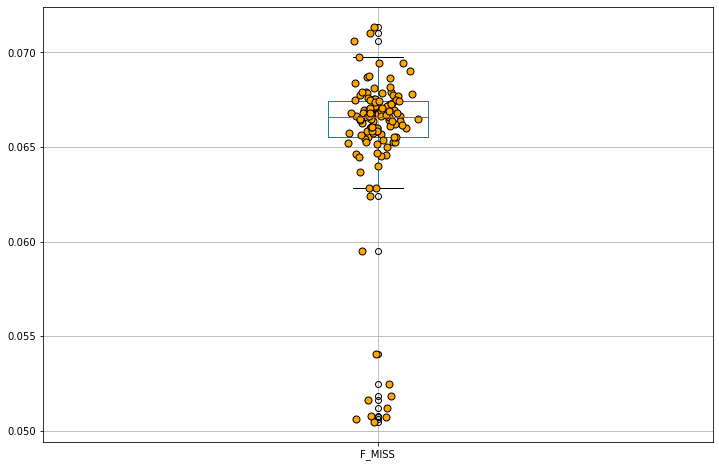

In [46]:
wgs[['F_MISS']].boxplot()

#d = 'F_MISS'
#y = wgs[d]
x = np.random.normal(1, 0.02, len(wgs))
_=plt.plot(x, wgs['F_MISS'], mfc = 'orange', mec='k', ms=7, marker="o", linestyle="None")


$\LaTeX$

In [47]:
wgs.IID ## all sample IDs to filter WGS in following tables

0      10174
1      10187
2      10205
3      10215
5      10231
       ...  
133    13149
134    13157
135    13164
136    13176
137    13177
Name: IID, Length: 120, dtype: int64

## Per sample stats 
### Count of the types of genotypes per sample
generated using gemini stats:
`gemini stats --gts-by-sample $GEMINIDB`


In [48]:
ps = pd.read_csv('perSampleStats.tsv', sep='\t', index_col='sample')

In [49]:
psw = ps.loc[wgs.IID] ## just looking at whole genomes
## 
## het/hom ratio high for a bunch of them
psw

,num_hom_ref,num_het,num_hom_alt,num_unknown,total
sample,,,,,
10174,20601622,2718983,1671250,761902,25753757
10187,20750479,2726108,1531037,746133,25753757
10205,20550449,2825176,1645100,733032,25753757
10215,20759430,2735224,1567096,692007,25753757
10231,20685104,2589983,1552260,926410,25753757
...,...,...,...,...,...
13149,20548450,2859642,1611673,733992,25753757
13157,20045220,3401023,1592893,714621,25753757
13164,20596644,2811954,1611027,734132,25753757


In [50]:
761902/25753757

0.02958411077653641

## Heterozygosity analysis
Heterozygosity to homozygosity ratio is not only a suitable tool for QC, it is also indicative for world populations. (See reference Gihan, Africans are around 2)

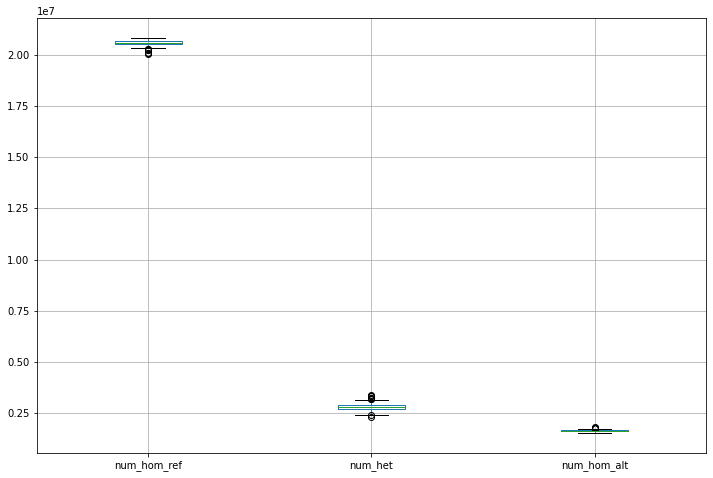

In [51]:
psw[psw.columns.values[:3]].boxplot()

#for col in psw.columns:
#    x = np.random.normal(1, 0.03, len(psw[col]))
#    plt.plot(x, ps.F, mfc = 'orange', mec='k', ms=7, marker="o", linestyle="None")
#    ps[['F']].boxplot()

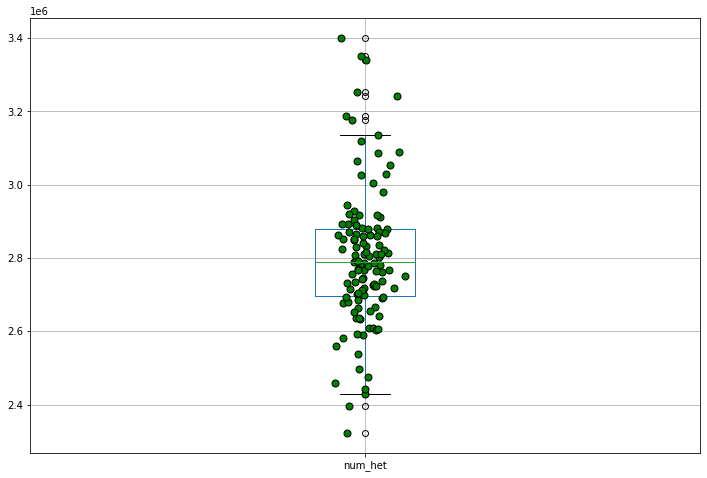

In [52]:
psw[['num_het']].boxplot()
#psw['hethomRatio'] = psw.apply(lambda row: row.num_het/row.num_hom_alt)

_=plt.plot(x, psw.num_het, mfc = 'green', mec='k', ms=7, marker="o", linestyle="None")

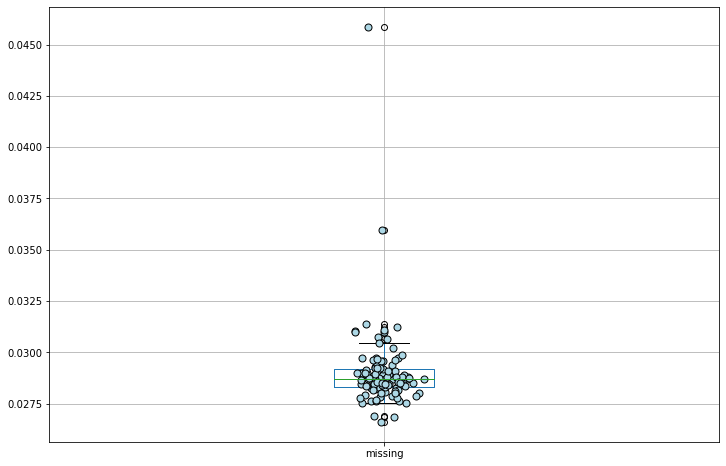

In [53]:
#psw['hethomRatio'] = psw.apply(lambda row: row['num_het']/row['num_hom_alt'])
psw['missing'] = [row['num_unknown']/row['total'] for i,row in psw.iterrows()]
psw[['missing']].boxplot()

plt.plot(x, psw.missing, mfc = 'lightblue', mec='k', ms=7, marker="o", linestyle="None")



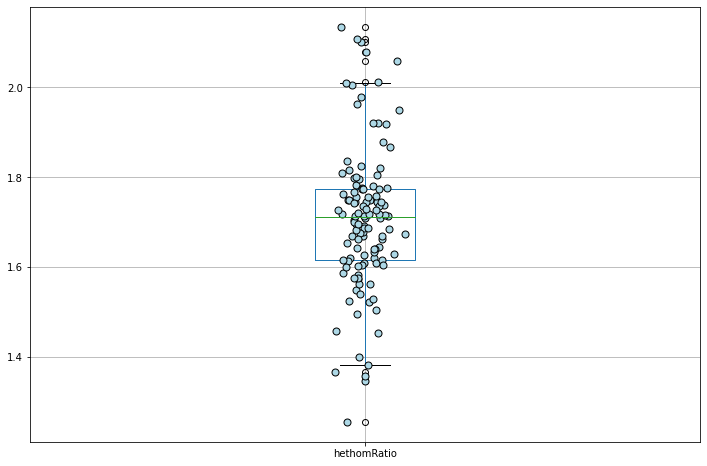

In [57]:
#psw['hethomRatio'] = psw.apply(lambda row: row['num_het']/row['num_hom_alt'])
psw['hethomRatio'] = [row['num_het']/row['num_hom_alt'] for i,row in psw.iterrows()]
psw[['hethomRatio']].boxplot()

plt.plot(x, psw.hethomRatio, mfc = 'lightblue', mec='k', ms=7, marker="o", linestyle="None")



In [58]:
psw.shape

(120, 7)

In [59]:
psw.sort_values(by='F', ascending=False)


KeyError: 'F'

In [60]:
psw.shape


(120, 7)

### Histogram of heterozygosity per sample

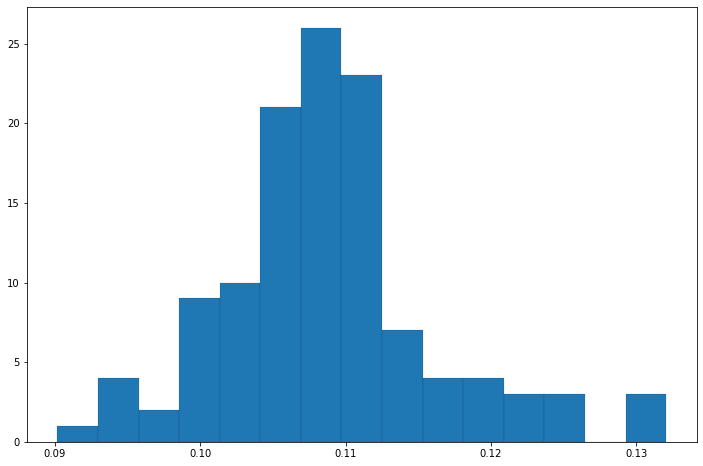

In [61]:
x = plt.hist(np.array(psw.num_het)/25753757, linewidth=0.1, edgecolor='k', bins=15)

## F-coefficient, per sample

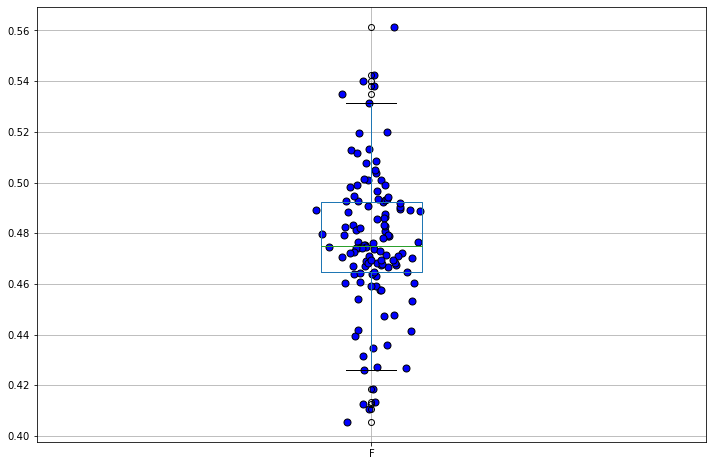

In [62]:
## F coefficient, adding to table

def F(AA, Aa, aa): 
    n = AA + Aa + aa 
    p = (2*AA + Aa)/(2*n) 
    q = 1-p 
    #print(n, p, q) 
    return 1 - (Aa/n)/(2*p*q) 

psw['F'] = [F(row['num_hom_ref'],row['num_het'],row['num_hom_alt']) for i, row in psw.iterrows()]

x = np.random.normal(1, 0.03, len(psw.F))
plt.plot(x, psw.F, mfc = 'blue', mec='k', ms=7, marker="o", linestyle="None")
_=psw[['F']].boxplot()

In [63]:
## Add as suppl. Table
psw.sort_values(by='F').to_csv('hethom.csv')

Important: This plot has been further combined with admixture component information, see 

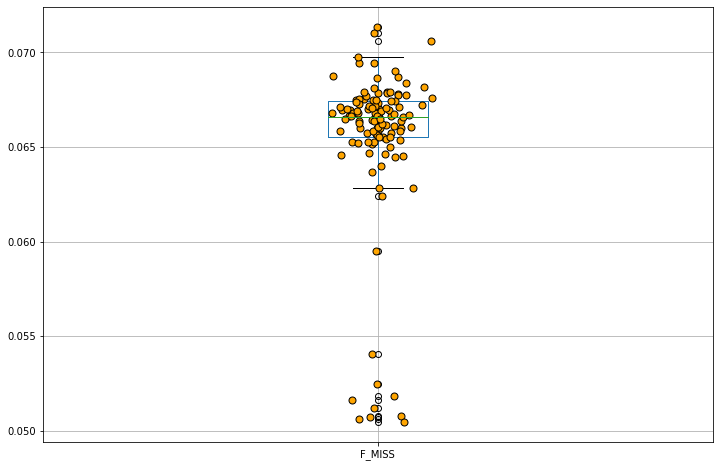

In [64]:
wgs[['F_MISS']].boxplot()
x = np.random.normal(1, 0.03, len(wgs[['F_MISS']]))
plt.plot(x, wgs['F_MISS'], mfc = 'orange', mec='k', ms=7, marker="o", linestyle="None")

## UAE specific variants
Analysis of all variants that are frequent in the UAE and rare elsewhere (as per exonic GnomAD)
`gemini query --header -q "select * from variants where gnomad_popmax_AF <0.01 and aaf >= 0.05 " 153_gemini_pass_normalized.db |gzip > /tmp/uaeCommonWorldRare.tsv.gz`

This give many useless calls, as Gemini uses Gnomad Exome and for all variants not in that db, it puts -1. Further filtering yields 444 (exonic) variants that are UAE specific. 143 when filtering further with 1000g project AFs.

In [ ]:
## Attention this is a large file (915M, compressed), better to use the filtered version, produced int the cell below
uae = pd.read_csv('uaeCommonWorldRare.tsv.gz', sep ='\t')


In [ ]:
pd.set_option('display.max_rows', 500)
uae0 = uae[(uae['gnomad_popmax_AF'] >= 0) & (uae['aaf_1kg_all'] <= 0.01) & (uae['aaf_1kg_all'] >= 0.00)]
uae0.to_csv('uaeCommonWorldRareExon.tsv.gz')

In [ ]:
uae0

## Snp variant counts
`gemini stats --snp-counts $GEMINIDB `


In [ ]:
sc = pd.read_csv('snpCounts.tsv', sep='\t')

In [ ]:
sc

In [ ]:
total = sum(sc['count'])

In [ ]:
total = sum(sc['count'])
transitions = [1,5,6,10]
ts = sc.loc[transitions]['count'].sum()
tv = total - ts
print(f"Transitions {ts}, Transversions {tv}, ratio: {ts/tv}")

## GME (Greater Middle east study)
Data set is rather small.

In [ ]:
gme = pd.read_csv('variome.trim_PanTro2_sampgenes.allsamples1.annot.tsv.gz', sep='\t')
gme

In [ ]:
Counter(gme.geneFunction)

## Repeatmasker
`gemini query --header -q "select * from variants where rmsk IS NOT NULL" $GEMINIDB |gzip > rmsk.tsv.gz`
This yields a large file (1.2Gb), 13003052 lines(!)